# Imports and declarations

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random
import json
from collections import Counter
import joblib

from scipy.optimize import fsolve

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, roc_auc_score

from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE

from sklearn.base import BaseEstimator, ClassifierMixin, clone

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from rdkit import Chem
from rdkit.Chem import AllChem
# from ccdc.io import EntryReader # csd lisence
# from Crystal_structure.aquire_features.feature_extraction_1 import get_pubchem_features
# from CSD_scrapping.CSDHandler import DatasetScrapper
# from CSD_scrapping.DatasetCleaning import DatasetEditor
# from Crystal_structure.CSD_scrapping.DatasetVisuals import DatasetFeatureReducer

from matplotlib.ticker import MultipleLocator
import matplotlib.gridspec as gridspec

# from aquire_features.feature_extraction_1 import FeatureExtractor, load_pickle_with_mol_dict
from sklearn.feature_selection import VarianceThreshold

from pulearn import ElkanotoPuClassifier # WeightedElkanotoPuClassifier,

COLOR_WHEEL = ['#FFD700', '#FFB14E', '#FA8775', '#EA5F94', '#CD34B5', '#9D02D7', '#0000FF', '#7695FF'] # two last colors!!!!!!!!!!!!
COLOR_WHEEL_2 = ['#089099', '#7CCBA2', '#FCDE9C', '#F0746E', '#7C1D6F']

Y_column = ['Polymorph_flag']
ID_columns = ['CSD_ID', 'Smiles']
Base_columns = Y_column + ID_columns
CSD_FEATURES = ['Number_of_rings', 'Mw', 'C', 'S', 'O', 'Cl', 'Si', 'B', 'N', 'P', 'I', 'Br', 'H', 'F']
Features_set_1 = Base_columns + CSD_FEATURES

pubchem_filenames = [r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\pubchem_features_0_V1.ftr',
                     r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\pubchem_features_1_V1.ftr',
                     r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\pubchem_features_2_V1.ftr',
                     r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\pubchem_features_3_V1.ftr',
                     r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\pubchem_features_4_V1.ftr']
PUBCHEM_FEATURES = ['complexity', 'covalent_unit_count', 'h_bond_acceptor_count', 'h_bond_donor_count',
                    'heavy_atom_count', 'rotatable_bond_count', 'tpsa',
                    'undefined_atom_stereo_count', 'undefined_bond_stereo_count', 'xlogp']
Features_set_2 = Features_set_1 + PUBCHEM_FEATURES

POLYMORPH_METHOD='Smiles'
csd_feather_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\CSD_dataset_V2.ftr'


features_1_filename=r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_1_df.ftr'
features_2_filename=r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_2_df.ftr'
features_3_filename=r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_3_df.ftr'
features_4_filename=r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_4_df.ftr'
features_5_filename=r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_5_df.ftr'
features_1_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_1_metrics_dict_list.json'
features_2_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_2_metrics_dict_list.json'
features_3_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_3_metrics_dict_list.json'
features_4_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_4_metrics_dict_list.json'
features_5_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_5_metrics_dict_list.json'
features_1_pu_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_1_pu_metrics_dict_list.json'
features_2_pu_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_2_pu_metrics_dict_list.json'
features_3_pu_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_3_pu_metrics_dict_list.json'
features_4_pu_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_4_pu_metrics_dict_list.json'
features_5_pu_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_5_pu_metrics_dict_list.json'
features_1_pu2_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_1_pu2_metrics_dict_list.json'
features_2_pu2_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_2_pu2_metrics_dict_list.json'
features_3_pu2_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_3_pu2_metrics_dict_list.json'
features_4_pu2_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_4_pu2_metrics_dict_list.json'
features_5_pu2_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_5_pu2_metrics_dict_list.json'


EXPLAINED_VARIANCE_PLOT_SIZE = (6.4, 4.8) 
EXPLAINED_VARIANCE_AX_POSITION = (0.1,0.2,0.5,0.8)
plt.rcParams['font.family'] = ['Helvetica']

ESTIMATOR_METRICS_PLOT_SIZE = (12.8, 4.8)
ESTIMATOR_METRICS_AX_POSITION = (0.1,0.1,0.5,0.8)

estimators_dict = {'LG': LogisticRegression(random_state=42, max_iter=1000),
                   'RF': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=100),
                   'SVM': SVC(kernel='linear', random_state=42, probability=True), # probability=True
                   'Nearest neighbors' : KNeighborsClassifier(n_neighbors=15, leaf_size=30),
                   'MLP': MLPClassifier(hidden_layer_sizes=(512, 512), max_iter=500, random_state=42),
                   }

class AlwaysTrueClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return np.ones(X.shape[0], dtype=bool)
    
    def predict_proba(self, X):
        return np.tile([0.0, 1.0], (X.shape[0], 1))
    
class AlwaysFalseClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return np.zeros(X.shape[0], dtype=bool)

    def predict_proba(self, X):
        return np.tile([1.0, 0.0], (X.shape[0], 1))

class RandomClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, random_state=None):
        self.random_state = random_state
        self.random_gen = np.random.default_rng(self.random_state)

    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return self.random_gen.integers(0, 2, X.shape[0]).astype(bool)

    def predict_proba(self, X):
        random_probs = self.random_gen.random((X.shape[0],))
        return np.column_stack([1 - random_probs, random_probs])

dummy_estimators = [AlwaysTrueClassifier(), AlwaysFalseClassifier(), RandomClassifier(random_state=42), RandomClassifier(random_state=123), RandomClassifier(random_state=999)]
dummy_estimators_names = ['All polymorphs', 'No polymorph', 'Random1', 'Random2', 'Random3']
dummy_features_1_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\dummy_features_1_metrics_dict_list.json'
dummy_features_2_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\dummy_features_2_metrics_dict_list.json'
dummy_features_3_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\dummy_features_3_metrics_dict_list.json'
dummy_features_4_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\dummy_features_4_metrics_dict_list.json'
dummy_features_5_metrics_dict_list_filename = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\dummy_features_5_metrics_dict_list.json'

In [ ]:
######################################
######################################
########### General ##################
######################################
######################################

def numpy_array_to_list(arr):
    if isinstance(arr, np.ndarray):
        return arr.tolist()
    return arr

def list_to_numpy_array(lst):
    if isinstance(lst, list):
        return np.array(lst, dtype="object")
    return lst

def save_list_of_dicts(data, filename):
    with open(filename, 'w') as f:
        json.dump(data, f, default=numpy_array_to_list)

def load_list_of_dicts(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
        return [{k: list_to_numpy_array(v) for k, v in item.items()} for item in data]

######################################
######################################
########### PRE PROCESS ##############
######################################
######################################

def divide_df_by_polymorph_flag(df):
    polymorph_mask = df['Polymorph_flag']==True
    polymorph_df = df[polymorph_mask]
    no_polymorph_df = df[~polymorph_mask]
    return polymorph_df, no_polymorph_df

def min_max_scale_dataframe(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    df_copy = df.copy()
    df_copy[df.columns] = scaled_data
    return df_copy

def split_dataframe(df, chunk_size):
    num_chunks = len(df) // chunk_size + (len(df) % chunk_size > 0)
    indices = np.random.permutation(len(df))
    index_chunks = np.array_split(indices, num_chunks)
    df_chunks = [df.iloc[idx] for idx in index_chunks]
    return df_chunks

def fit_vector_to_pu_learning(vector, pu_learning=False):
    if isinstance(vector, pd.Series):
        vector_copy = vector.copy()
        if pu_learning:
            vector_copy = vector_copy.replace({False: -1, True: 1})
    elif isinstance(vector, np.ndarray):
        vector_copy = vector.copy()
        if pu_learning:
            vector_copy = np.where(vector_copy == True, 1, vector_copy)
            vector_copy = np.where(vector_copy == False, -1, vector_copy)
    return vector_copy
    # series_copy = series.copy()
    # if pu_learning:
    #     series_copy = series_copy.replace({False: -1, True: 1})
    # return series_copy

def X_y_split(df, y_column_name):
    X = df.drop(columns=y_column_name)
    y = df[y_column_name]
    return X, y
    
def preprocess_df_for_evaluation(model_df, pu_learning=False):
    copy_df = model_df.copy()
    if pu_learning:
        copy_df['Polymorph_flag'] = fit_vector_to_pu_learning(copy_df['Polymorph_flag'], pu_learning=pu_learning)
    X_total, y_total = X_y_split(copy_df, y_column_name='Polymorph_flag')
    polymorph_df, non_polymorph_df = divide_df_by_polymorph_flag(copy_df)
    return X_total, y_total, polymorph_df, non_polymorph_df

######################################
######################################
########### TRAIN## ##################
######################################
######################################

def train_and_use_estimator(estimator, X, y, pu_learning=False, predict_method='predict', test_size=0.25, random_state=42, stratify=True):
    if stratify:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    if pu_learning:
        estimator = ElkanotoPuClassifier(estimator, hold_out_ratio=0.2)
    estimator.fit(X_train.to_numpy(), y_train.to_numpy())
    train_results = {'trained_estimator': estimator, 'y_train': y_train, 'y_train_pred': estimator.predict(X_train),
                                                     'y_test': y_test, 'y_test_pred': estimator.predict(X_test),
    }
    if predict_method == 'predict_proba':
        y_prob_pred = estimator.predict_proba(X_test.to_numpy())[:, 1]
        train_results.update({'y_prob_pred': y_prob_pred})
    return train_results

######################################
######################################
########### POST ANALYSIS ############
######################################
######################################
    
def get_y_from_results(train_results, mode):
    if mode == 'sub_train' or mode == 'os_train' or mode == 'rc_train' or mode == 'consensus_train':
        y = train_results.get('y_train')
        y_pred = train_results.get('y_train_pred')
    elif mode == 'sub_test' or mode == 'os_test' or mode == 'rc_test' or mode ==  'consensus_test':
        y = train_results.get('y_test')
        y_pred = train_results.get('y_test_pred')
    elif mode == 'full':
        y = train_results.get('y_full')
        y_pred = train_results.get('y_full_pred')
    elif mode == 'ensamble':
        y = train_results.get('y_ensamble')
        y_pred = train_results.get('y_ensamble_pred')
    elif mode == 'os_val':
        y = train_results.get('y_val')
        y_pred = train_results.get('y_val_pred')
    else:
        y, y_pred = None, None
    return y, y_pred    

def get_auc_score(y, y_pred, predict_method):
    if predict_method == 'predict_proba':
        auc = roc_auc_score(y, y_pred)
        y = np.where(y > 0.5, 1, 0)
        y_pred = np.where(y_pred > 0.5, 1, 0)
    else:
        auc = 0
    return y, y_pred, auc    

def get_recall_acc_sp(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()    
    with np.errstate(divide='ignore', invalid='ignore'):
        recall = np.nan_to_num(tp / (tp + fn), nan=0.0)
        accuracy = np.nan_to_num((tp + tn) / (tp + tn + fp + fn), nan=0.0)
        specificity = np.nan_to_num(tn / (tn + fp), nan=0.0)
    return recall, accuracy, specificity

def get_all_metrics(model_results, predict_method='predict', mode='sub_train'):
    # update tracker - opt is boot-orig
    if 'boot' in mode:
        boot_auc, boot_recall, boot_accuracy, boot_specificity, boot_pos_percent = get_all_metrics(model_results, predict_method, mode='consensus_test')
        orig_auc, orig_recall, orig_accuracy, orig_specificity, orig_pos_percent = get_all_metrics(model_results, predict_method, mode='consensus_train')
        auc = boot_auc - orig_auc
        recall = boot_recall - orig_recall
        accuracy = boot_accuracy - orig_accuracy
        specificity = boot_specificity - orig_specificity
        pos_percent = boot_pos_percent - orig_pos_percent
    else:
        y, y_pred = get_y_from_results(model_results, mode)
        y, y_pred, auc = get_auc_score(y, y_pred, predict_method)
        recall, accuracy, specificity = get_recall_acc_sp(y, y_pred)
        pos_percent = round(sum(y_pred) / len(y_pred), 4)
    return auc, recall, accuracy, specificity, pos_percent


######################################
######################################
########### TRACKER ##################
######################################
######################################

def eval_method_to_base_modes(eval_method):
    base_modes = None
    if eval_method == 'cv':
        base_modes = ['sub_train', 'sub_test', 'full']
    elif eval_method == 'ensamble':
        base_modes = ['ensamble']
    elif eval_method == 'os_SMOTE':
        base_modes = ['os_train', 'os_test', 'os_val']
    elif eval_method == 'random_columns':
        base_modes = ['rc_train', 'rc_test']
    elif eval_method == 'consensus_cv':
        base_modes = ['consensus_train', 'consensus_test']
    elif eval_method == 'consensus_cv_boot':
        base_modes = ['consensus_train', 'consensus_test', 'consensus_boot']
    return base_modes

def get_tracker_keys(mode):
    if mode == 'sub_train':
        tracker_keys = ['sub_train_recall', 'sub_train_accuracy', 'sub_train_specificity', 'sub_train_ROCAUC', 'sub_train_pos_percent']
    elif mode == 'sub_test':
        tracker_keys = ['sub_test_recall', 'sub_test_accuracy', 'sub_test_specificity', 'sub_test_ROCAUC', 'sub_test_pos_percent']
    elif mode == 'full':
        tracker_keys = ['full_recall', 'full_accuracy', 'full_specificity', 'full_ROCAUC', 'full_pos_percent']
    elif mode == 'ensamble':
        tracker_keys = ['ensamble_recall', 'ensamble_accuracy', 'ensamble_specificity', 'ensamble_ROCAUC', 'ensamble_pos_percent']
    elif mode == 'os_train':
        tracker_keys = ['os_train_recall', 'os_train_accuracy', 'os_train_specificity', 'os_train_ROCAUC', 'os_train_pos_percent']
    elif mode == 'os_test':
        tracker_keys = ['os_test_recall', 'os_test_accuracy', 'os_test_specificity', 'os_test_ROCAUC', 'os_test_pos_percent']
    elif mode == 'os_val':
        tracker_keys = ['os_val_recall', 'os_val_accuracy', 'os_val_specificity', 'os_val_ROCAUC', 'os_val_pos_percent']
    elif mode == 'rc_train':
        tracker_keys = ['rc_train_recall', 'rc_train_accuracy', 'rc_train_specificity', 'rc_train_ROCAUC', 'rc_train_pos_percent']
    elif mode == 'rc_test':
        tracker_keys = ['rc_test_recall', 'rc_test_accuracy', 'rc_test_specificity', 'rc_test_ROCAUC', 'rc_test_pos_percent']
    elif mode == 'consensus_train':
        tracker_keys = ['consensus_train_recall', 'consensus_train_accuracy', 'consensus_train_specificity', 'consensus_train_ROCAUC', 'consensus_train_pos_percent']
    elif mode == 'consensus_test':
        tracker_keys = ['consensus_test_recall', 'consensus_test_accuracy', 'consensus_test_specificity', 'consensus_test_ROCAUC', 'consensus_test_pos_percent']
    elif mode == 'consensus_boot':
        tracker_keys = ['consensus_boot_recall', 'consensus_boot_accuracy', 'consensus_boot_specificity', 'consensus_boot_ROCAUC', 'consensus_boot_pos_percent']
    else:
        tracker_keys = None
    return tracker_keys

def setup_tracker(modes):
    tracker = dict()
    for mode in modes:
        tracker_keys = get_tracker_keys(mode)
        for key in tracker_keys:
            tracker[key] = []
    return tracker

def update_tracker(tracker, train_results, predict_method='predict', mode='sub_train'):
    if 'boot' in mode:
        test_results = train_results[0]
        boot_results = train_results[1:]
        all_auc, all_recall, all_accuracy, all_specificity, all_pos_percent = [], [], [], [], []
        for inner_boot_results in boot_results:
            print('mode:', mode)
            auc, recall, accuracy, specificity, pos_percent = get_all_metrics(inner_boot_results, predict_method, mode)
            all_auc.append(auc)
            all_recall.append(recall)
            all_accuracy.append(accuracy)
            all_specificity.append(specificity)
            all_pos_percent.append(all_pos_percent)
        mean_boot_auc = np.mean(all_auc)
        mean_boot_recall = np.mean(all_recall)
        mean_boot_accuracy = np.mean(all_accuracy)
        mean_boot_specificity = np.mean(all_specificity)
        mean_boot_pos_percent = np.mean(all_pos_percent)

        test_auc, test_recall, test_accuracy, test_specificity, test_pos_percent = get_all_metrics(test_results, predict_method, mode='consensus_test')

        auc = test_auc - mean_boot_auc
        recall = test_recall - mean_boot_recall
        accuracy = test_accuracy - mean_boot_accuracy
        specificity = test_specificity - mean_boot_specificity
        pos_percent = test_pos_percent - mean_boot_pos_percent
    else:
        auc, recall, accuracy, specificity, pos_percent = get_all_metrics(train_results, predict_method, mode)
    tracker_keys = get_tracker_keys(mode)
    for key, value in zip(tracker_keys, [recall, accuracy, specificity, auc, pos_percent]):
        tracker[key].append(value)
    return tracker

def extract_values_from_tracker(tracker, mode):
    keys = get_tracker_keys(mode)
    recall = tracker.get(keys[0])
    accuracy = tracker.get(keys[1])
    specificty = tracker.get(keys[2])
    auc = tracker.get(keys[3])
    pos_percent = tracker.get(keys[4])
    return {'Recall': recall, 'Accuracy': accuracy, 'Specificty': specificty,
            'ROC-AUC': auc, 'Positive percentile': pos_percent}
    # return recall, accuracy, specificty, auc, pos_percent

# def tracker_to_mean_results(tracker, mode):
#     recall, accuracy, specificty, auc, pos_percent = extract_values_from_tracker(tracker, mode)
#     # if 'sub' in mode or 'rc_' in mode or 'full' in mode:
#     mean_recall = recall # np.mean(recall)
#     mean_accuracy = accuracy # np.mean(accuracy)
#     mean_specificty = specificty # np.mean(specificty)
#     mean_auc = auc # np.mean(auc)
#     mean_pos_percent = pos_percent # np.mean(pos_percent)
#     # else:
#     #     mean_recall = recall[0]
#     #     mean_accuracy = accuracy[0]
#     #     mean_specificty = specificty[0]
#     #     mean_auc = auc[0]
#     #     mean_pos_percent = pos_percent[0]
#     return {'Recall': mean_recall, 'Accuracy': mean_accuracy, 'Specificty': mean_specificty,
#             'ROC-AUC': mean_auc, 'Positive percentile': mean_pos_percent}

def get_result_keys(eval_method):
    result_keys = []
    if eval_method == 'cv':
        result_keys = ['train_results', 'test_results', 'full_results']
    elif eval_method == 'ensamble':
        result_keys = ['ensamble_results']
    elif eval_method == 'os_SMOTE' or eval_method == 'consensus_cv_boot':
        result_keys = ['train_results', 'test_results', 'validation_results']
    elif eval_method == 'random_columns' or eval_method == 'consensus_cv':
        result_keys = ['train_results', 'test_results']
    return result_keys

def unpack_tracker_by_eval_method(tracker, eval_method):
    results_dict = unpack_tracker_by_eval_method(tracker, 'cv') if eval_method =='ensamble' else dict()
    result_keys = get_result_keys(eval_method)
    base_modes = eval_method_to_base_modes(eval_method)
    for key, mode in zip(result_keys, base_modes):
        results_dict[key] = extract_values_from_tracker(tracker, mode)
    return results_dict

    # if eval_method == 'cv':
    #     results_dict['train_results'] = extract_values_from_tracker(tracker, base_modes[0])
    #     results_dict['test_results'] = extract_values_from_tracker(tracker, base_modes[1])
    #     results_dict['full_results'] = extract_values_from_tracker(tracker, base_modes[2])
    # elif eval_method == 'ensamble':
    #     results_dict = unpack_tracker_by_eval_method(tracker, 'cv')
    #     results_dict['ensamble_results'] = extract_values_from_tracker(tracker, base_modes[0])
    # elif eval_method == 'os_SMOTE' or eval_method == 'consensus_cv_boot':
    #     results_dict['train_results'] = extract_values_from_tracker(tracker, base_modes[0])
    #     results_dict['test_results'] = extract_values_from_tracker(tracker, base_modes[1])
    #     results_dict['validation_results'] = extract_values_from_tracker(tracker, base_modes[2])
    # elif eval_method == 'random_columns' or eval_method == 'consensus_cv':
    #     results_dict['train_results'] = extract_values_from_tracker(tracker, base_modes[0])
    #     results_dict['test_results'] = extract_values_from_tracker(tracker, base_modes[1])
    # return results_dict

######################################
######################################
########### OVER SAMPLE ##############
######################################
######################################

def resample_cost(X, y, method='SMOTE', random_state=42):
    if method=='SMOTE':
        sampler = SMOTE(random_state=random_state)
    elif method=='ADASYN':
        sampler = ADASYN(random_state=random_state)
    else:
        sampler = RandomOverSampler(random_state=random_state)
    X_res, y_res = sampler.fit_resample(X, y)
    return X_res, y_res        

def over_samp(model_df, estimator, resample_method='SMOTE', predict_method='predict', pu_learning=False):
    base_modes = eval_method_to_base_modes('os_SMOTE')
    X_total, y_total, *_ = preprocess_df_for_evaluation(model_df, pu_learning)
    X_train, X_val, y_train, y_val = train_test_split(X_total, y_total, test_size=0.25, random_state=42, stratify=y_total)
    X_res, y_res = resample_cost(X_train, y_train, method=resample_method)
    tracker = setup_tracker(modes=base_modes) # , predict_method=predict_method
    train_results = train_and_use_estimator(estimator=estimator, X=X_res, y=y_res, pu_learning=pu_learning,
                                            predict_method=predict_method, test_size=0.25, random_state=42, stratify=True)
    for mode in base_modes:
        if mode == 'os_val':
            trn_est = train_results.get('trained_estimator')
            val_results = {'y_val': y_val, 'y_val_pred': trn_est.predict(X_val)}
            tracker = update_tracker(tracker=tracker, train_results=val_results, predict_method=predict_method, mode=mode)
        else:
            tracker = update_tracker(tracker=tracker, train_results=train_results, predict_method=predict_method, mode=mode)
    return tracker

######################################
######################################
########### UNDER SAMPLE #############
######################################
######################################

def undr_samp_cv(model_df, estimator, predict_method='predict', pu_learning=False): # 
    trained_estimators = []
    base_modes = eval_method_to_base_modes('cv')
    X_full, y_full, polymorph_df, non_polymorph_df = preprocess_df_for_evaluation(model_df, pu_learning)
    sampled_size = len(polymorph_df)
    non_polymorph_chunks = split_dataframe(non_polymorph_df, sampled_size)
    tracker = setup_tracker(modes=base_modes+['ensamble']) # , predict_method=predict_method
    for chunk_df in non_polymorph_chunks:
        combined_df = pd.concat([polymorph_df, chunk_df])
        X, y = X_y_split(combined_df, y_column_name='Polymorph_flag')
        y = fit_vector_to_pu_learning(y, pu_learning)
        train_results = train_and_use_estimator(estimator=estimator, X=X, y=y, pu_learning=pu_learning,
                                                predict_method=predict_method, test_size=0.25, random_state=42, stratify=True)
        for mode in base_modes:
            if mode == 'full':
                trn_est = train_results.get('trained_estimator')
                trained_estimators.append(trn_est)
                full_results = {'y_full': y_full, 'y_full_pred': trn_est.predict(X_full)}
                tracker = update_tracker(tracker=tracker, train_results=full_results, predict_method=predict_method, mode=mode)
            else:
                tracker = update_tracker(tracker=tracker, train_results=train_results, predict_method=predict_method, mode=mode)
    return tracker, trained_estimators

class CustomEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, fitted_estimators):
        self.fitted_estimators = fitted_estimators

    def predict(self, X):
        predictions = np.array([est.predict(X) for _, est in self.fitted_estimators])
        maj_vote = np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=predictions)
        return maj_vote

    def predict_proba(self, X):
        probas = [est.predict_proba(X) for _, est in self.fitted_estimators if hasattr(est, "predict_proba")]
        if not probas:
            raise AttributeError("None of the base estimators support predict_proba.")
        return np.mean(probas, axis=0)

def undr_samp_ensamble(model_df, estimator, predict_method='predict', pu_learning=False):
    base_modes = eval_method_to_base_modes('ensamble')
    X_total, y_total, *_ = preprocess_df_for_evaluation(model_df, pu_learning)
    X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.25, random_state=42, stratify=y_total)
    train_df = pd.concat([X_train, y_train], axis=1)
    tracker, trained_estimators = undr_samp_cv(train_df, estimator, predict_method, pu_learning)
    named_estimator_list = [('estimator_{}'.format(idx), estimator) for idx, estimator in enumerate(trained_estimators)]
    ensambler = CustomEnsembleClassifier(named_estimator_list)
    ensamble_results = {'y_ensamble': y_test.to_numpy(), 'y_ensamble_pred': ensambler.predict(X_test)}
    tracker = update_tracker(tracker=tracker, train_results=ensamble_results, predict_method=predict_method, mode=base_modes[0]) # 
    return tracker


######################################
######################################
########### Consensus  CV  ###########
######################################
######################################

from sklearn.utils import resample
from sklearn.base import clone
import gc

class BootstrapValidation:
    def __init__(self, estimator, n_bootstrap=100, test_size=0.3, 
                 random_state=42):
        self.estimator = estimator
        self.n_bootstrap = n_bootstrap
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        np.random.seed(self.random_state)
        X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state)        
        big_estimator = clone(self.estimator)
        big_estimator.fit(X_train_orig, y_train_orig)
        self.test_results = {'y_test': y_test_orig, 'y_test_pred': big_estimator.predict(X_test_orig)}
        all_boot_results = []
        for i in range(self.n_bootstrap):
            gc.collect()
            print('inner_boot_idx:', i)
            X_boot, y_boot = resample(X, y, random_state=i)
            boot_estimator = clone(self.estimator)
            boot_estimator.set_params(random_state=i)
            boot_estimator.fit(X_boot, y_boot)
            print('finished fitting')
            boot_results = {'y_train': y_train_orig, 'y_train_pred': boot_estimator.predict(X_train_orig), # y X
                            'y_test': y_boot, 'y_test_pred': boot_estimator.predict(X_boot)}
            all_boot_results.append(boot_results)
        self.all_boot_results = all_boot_results
        return self

class ConsensusNestedCV:
    def __init__(self, estimator, n_features_to_select, tracker, predict_method='predict', pu_learning=False, boot_strap=False, param_grid=None, 
                 outer_cv=5, inner_cv=5, grid_cv=3, consensus_threshold=0.6, random_state=42):
        self.estimator = estimator
        self.n_features_to_select = n_features_to_select
        self.feature_selector = SelectKBest(score_func=f_classif, k=self.n_features_to_select)
        self.tracker = tracker
        self.predict_method = predict_method
        self.pu_learning = pu_learning
        self.boot_strap = boot_strap
        self.param_grid = param_grid
        self.outer_cv = outer_cv
        self.inner_cv = inner_cv
        self.grid_cv = grid_cv
        self.consensus_threshold = consensus_threshold
        self.random_state = random_state
        
    def fit(self, X, y):
        y = fit_vector_to_pu_learning(y, self.pu_learning)
        cv_outer = KFold(n_splits=self.outer_cv, shuffle=True, random_state=self.random_state)
        outer_scores = []
        consensus_features_list = []
        for con_idx, (train_idx, test_idx) in enumerate(cv_outer.split(X)):
            # print('con_idx:', con_idx)
            gc.collect()
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
            cv_inner = KFold(n_splits=self.inner_cv, shuffle=True, random_state=self.random_state)
            feature_counts = np.zeros(X_train.shape[1])
            for inner_train_idx, inner_val_idx in cv_inner.split(X_train):
                X_inner_train = X_train[inner_train_idx]
                y_inner_train = y_train[inner_train_idx]
                self.feature_selector.fit(X_inner_train, y_inner_train)
                selected_features = self.feature_selector.get_support()
                feature_counts += selected_features
                # Possible to also use validation score 

            consensus_features = feature_counts >= (self.consensus_threshold * self.inner_cv)
            if np.sum(consensus_features) == 0: # Fallback: select top features if no consensus
                top_k = min(self.n_features_to_select, X_train.shape[1] // 10)
                top_indices = np.argsort(feature_counts)[-top_k:]
                consensus_features = np.zeros(X_train.shape[1], dtype=bool)
                consensus_features[top_indices] = True
            
            # Train final model on consensus features
            X_train_selected = X_train[:, consensus_features]
            X_test_selected = X_test[:, consensus_features]
            if self.param_grid:
                grid_search = GridSearchCV(
                    self.estimator, self.param_grid, 
                    cv=self.grid_cv, scoring='accuracy'
                )
                grid_search.fit(X_train_selected, y_train)
                final_model = grid_search.best_estimator_
            else:
                final_model = self.estimator
                if self.pu_learning:
                    final_model = ElkanotoPuClassifier(final_model, hold_out_ratio=0.2)
                final_model.fit(X_train_selected, y_train)
            
            if self.boot_strap:
                base_modes = eval_method_to_base_modes('consensus_cv_boot')
                for mode in base_modes:
                    gc.collect()
                    print(mode)
                    if 'train' in mode:
                        outter_train_results = {'y_train': y_train, 'y_train_pred': final_model.predict(X_train_selected)}
                        self.tracker = update_tracker(self.tracker, outter_train_results, self.predict_method, mode)
                    elif 'test' in mode:
                        outter_test_results = {'y_test': y_test, 'y_test_pred': final_model.predict(X_test_selected)}
                        self.tracker = update_tracker(self.tracker, outter_test_results, self.predict_method, mode)
                    elif 'boot' in mode:
                        bootstaper = BootstrapValidation(estimator=final_model, n_bootstrap=15)
                        bootstaper.fit(X[:, consensus_features], y)
                        print('finished booting')
                        test_results = bootstaper.test_results
                        all_boot_results = bootstaper.all_boot_results
                        print('data process')
                        self.tracker = update_tracker(self.tracker, [test_results] + all_boot_results, self.predict_method, mode)
            else:
                base_modes = eval_method_to_base_modes('consensus_cv')
                for mode in base_modes:
                    if 'train' in mode:
                        outter_train_results = {'y_train': y_train, 'y_train_pred': final_model.predict(X_train_selected)}
                        self.tracker = update_tracker(self.tracker, outter_train_results, self.predict_method, mode)
                    elif 'test' in mode:
                        outter_test_results = {'y_test': y_test, 'y_test_pred': final_model.predict(X_test_selected)}
                        self.tracker = update_tracker(self.tracker, outter_test_results, self.predict_method, mode)

            consensus_features_list.append(consensus_features)
        
        self.outer_scores_ = outer_scores
        self.consensus_features_list_ = consensus_features_list
        self.mean_score_ = np.mean(outer_scores)
        self.std_score_ = np.std(outer_scores)
        return self

def consensus_cv_eval(model_df, estimator, n_features_to_select, predict_method='predict', pu_learning=False):
    base_modes = eval_method_to_base_modes('consensus_cv')
    X_total, y_total, *_ = preprocess_df_for_evaluation(model_df, pu_learning)
    tracker = setup_tracker(modes=base_modes)
    consens_cv_estimator = ConsensusNestedCV(estimator=estimator, n_features_to_select=n_features_to_select, tracker=tracker, predict_method=predict_method,
                                             pu_learning=pu_learning, outer_cv=15)
    consens_cv_estimator.fit(X_total.to_numpy(), y_total.to_numpy())
    updated_tracker = consens_cv_estimator.tracker
    return updated_tracker

def consensus_cv_eval_boot(model_df, estimator, n_features_to_select, predict_method='predict', pu_learning=False):
    base_modes = eval_method_to_base_modes('consensus_cv_boot')
    X_total, y_total, *_ = preprocess_df_for_evaluation(model_df, pu_learning)
    tracker = setup_tracker(modes=base_modes)
    consens_cv_estimator = ConsensusNestedCV(estimator=estimator, boot_strap=True, n_features_to_select=n_features_to_select, predict_method=predict_method, tracker=tracker, outer_cv=3)
    consens_cv_estimator.fit(X_total.to_numpy(), y_total.to_numpy())
    updated_tracker = consens_cv_estimator.tracker
    return updated_tracker


######################################
######################################
########### RANDOM COLUMNS ###########
######################################
######################################

def random_columns_eval(model_df, estimator, n_columns, n_repeats=100, predict_method='predict', pu_learning=False):
    base_modes = eval_method_to_base_modes('random_columns')
    X_total, y_total, *_ = preprocess_df_for_evaluation(model_df, pu_learning)
    tracker = setup_tracker(modes=base_modes)
    feature_columns = list(X_total.columns)
    for _ in range(n_repeats):
        selected_columns = random.sample(feature_columns, n_columns)
        train_results = train_and_use_estimator(estimator=estimator, X=X_total[selected_columns], y=y_total,
                                                pu_learning=pu_learning, predict_method=predict_method, test_size=0.25,
                                                random_state=42, stratify=True)
        for mode in base_modes:
            tracker = update_tracker(tracker=tracker, train_results=train_results, predict_method=predict_method, mode=mode)
    return tracker


# Full run

In [4]:
def get_import_f_name(feature_set_num):
    if feature_set_num == 1:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_1_df.ftr'
    elif feature_set_num == 2:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_2_df.ftr'
    elif feature_set_num == 3:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_3_df.ftr'
    elif feature_set_num == 4:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_4_df.ftr'
    elif feature_set_num == 5:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_5_df.ftr'
    return f_name

def get_export_f_name(feature_set_num):
    if feature_set_num == 1:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_1_metrics_dict_list.pkl'
    elif feature_set_num == 2:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_2_metrics_dict_list.pkl'
    elif feature_set_num == 3:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_3_metrics_dict_list.pkl'
    elif feature_set_num == 4:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_4_metrics_dict_list.pkl'
    elif feature_set_num == 5:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_5_metrics_dict_list.pkl'
    return f_name

def get_export_pu_f_name(feature_set_num):
    if feature_set_num == 1:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_1_pu_metrics_dict_list.pkl'
    elif feature_set_num == 2:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_2_pu_metrics_dict_list.pkl'
    elif feature_set_num == 3:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_3_pu_metrics_dict_list.pkl'
    elif feature_set_num == 4:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_4_pu_metrics_dict_list.pkl'
    elif feature_set_num == 5:
        f_name = r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\database_files\features_5_pu_metrics_dict_list.pkl'
    return f_name

def get_model_df(feature_set_num):
    ID_columns = ['CSD_ID', 'Smiles']
    f_name = get_import_f_name(feature_set_num)
    features_df = pd.read_feather(f_name)
    model_df = features_df.drop(ID_columns, axis=1)
    feature_columns = list(model_df.columns[1:])
    model_df[feature_columns] = min_max_scale_dataframe(model_df[feature_columns])
    return model_df

def save_data(data, f_name = 'try.pkl'):
    joblib.dump(data, f_name)

def load_data(f_name):
    loaded_data = joblib.load(f_name)
    return loaded_data

def get_feature_set_results(feature_set_num, estimators_dict, eval_methods=['cv'], predict_method='predict',pu_learning=False, save_results=False):
    model_df = get_model_df(feature_set_num)
    results_dict = dict()
    for estimator_name, estimator in estimators_dict.items():
        print(estimator_name)
        full_metrics_dict = dict()
        for eval_method in eval_methods:
            if eval_method == 'cv':
                metrics_dict = undr_samp_cv(model_df, estimator, predict_method, pu_learning)[0]
            elif eval_method == 'ensamble':
                metrics_dict = undr_samp_ensamble(model_df, estimator, predict_method, pu_learning)
            elif eval_method == 'os_SMOTE' and estimator_name != 'SVM' and estimator_name != 'MLP':
                metrics_dict = over_samp(model_df, estimator, 'SMOTE', predict_method, pu_learning)
            elif eval_method == 'random_columns':
                metrics_dict = random_columns_eval(model_df, estimator, 150, 100, predict_method, pu_learning)
            elif eval_method == 'consensus_cv':
                metrics_dict = consensus_cv_eval(model_df, estimator, 150, predict_method, pu_learning)
            # elif eval_method == 'consensus_cv_boot':
            #     metrics_dict = consensus_cv_eval_boot(model_df, estimator, 150, predict_method, pu_learning)
            full_metrics_dict = {**full_metrics_dict, **metrics_dict} #full_metrics_dict | metrics_dict
        results_dict[estimator_name] = full_metrics_dict
    if save_results:
        export_f_name = get_export_pu_f_name(feature_set_num) if pu_learning else get_export_f_name(feature_set_num)
        save_data(results_dict, export_f_name)
    return results_dict

In [ ]:
estimators_dict = {'LG': LogisticRegression(random_state=42, max_iter=1000),
                   'RF': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=100),
                   'SVM': SVC(kernel='linear', random_state=42, probability=True), # probability=True
                   'Nearest neighbors' : KNeighborsClassifier(n_neighbors=15, leaf_size=30),
                   'MLP': MLPClassifier(hidden_layer_sizes=(512, 512), max_iter=500, random_state=42),
                   }

feature_set_dict = {
                    1: ['ensamble', 'os_SMOTE'],
                    2: ['ensamble', 'os_SMOTE'],
                    3: ['ensamble', 'os_SMOTE'],
                    4: ['consensus_cv'],
                    5: ['consensus_cv'],
                    }

######################################
######################################
######### Normal evaluation ##########
######################################
######################################

feature_set_results = dict()
for feature_set_num, eval_modes in feature_set_dict.items():
    print(feature_set_num, eval_modes)
    results = get_feature_set_results(feature_set_num, estimators_dict, pu_learning=False, eval_methods=eval_modes, predict_method='predict_proba')
    feature_set_results[feature_set_num] = results

save_data(feature_set_results, 'full_pu_eval.pkl') # 'fset_45_normal_eval.pkl' 

######################################
######################################
########### PU evaluation ############
######################################
######################################

feature_set_results = dict()
for feature_set_num, eval_modes in feature_set_dict.items():
    print(feature_set_num, eval_modes)
    results = get_feature_set_results(feature_set_num, estimators_dict, pu_learning=True, eval_methods=eval_modes, predict_method='predict_proba')
    feature_set_results[feature_set_num] = results

save_data(feature_set_results, 'full_pu_eval.pkl') # 'fset_45_pu_eval.pkl' 

4 ['consensus_cv']
LG
RF
SVM
Nearest neighbors
MLP
5 ['consensus_cv']
LG
RF
SVM
Nearest neighbors
MLP


# Load and init process

In [47]:
def get_eval_methods(result_keys):
    eval_methods = set()
    for key in result_keys:
        if key.startswith('sub'):
            eval_methods.add('cv')
        elif key.startswith('ensamble'): #'ensamble' in key:
            eval_methods.add('ensamble')
        elif key.startswith('os'): # 'os' in key:
            eval_methods.add('os_SMOTE')
        elif key.startswith('rc'): # 'rc' in key:
            eval_methods.add('random_columns')
        # elif key.starts_with('consensus_boot'):
        #     eval_methods.add('consensus_cv_boot')
        elif key.startswith('consensus'):
            eval_methods.add('consensus_cv')
    if 'cv' in eval_methods and 'ensamble' in eval_methods:
        eval_methods.remove('cv')
    return list(eval_methods)

def unpack_saved_results(f_name):
    final_dict = dict()
    feature_set_results_dict = load_data(f_name)
    for feature_set_num, result_by_algo in feature_set_results_dict.items():
        for algo_name, results_dict in result_by_algo.items():
            eval_methods = get_eval_methods(results_dict.keys())
            for eval_method in eval_methods:
                inner_results = unpack_tracker_by_eval_method(results_dict, eval_method)
                if eval_method not in final_dict:
                    final_dict[eval_method] = dict()
                if feature_set_num not in final_dict[eval_method]:
                    final_dict[eval_method][feature_set_num] = dict()
                final_dict[eval_method][feature_set_num][algo_name] = inner_results
    return final_dict

def unpack_saved_results_full_by_fset(f_name):
    final_dict = dict()  # eval_method → feature_set_num → metric_key → inner_metric_key → algo_name
    feature_set_results_dict = load_data(f_name)
    for feature_set_num, result_by_algo in feature_set_results_dict.items():
        for algo_name, results_dict in result_by_algo.items():
            eval_methods = get_eval_methods(results_dict.keys())
            for eval_method in eval_methods:
                inner_results = unpack_tracker_by_eval_method(results_dict, eval_method)
                for metric_key, metric_dict in inner_results.items():
                    for inner_metric_key, inner_metric_value in metric_dict.items():
                        final_dict.setdefault(eval_method, {}) \
                                  .setdefault(feature_set_num, {}) \
                                  .setdefault(metric_key, {}) \
                                  .setdefault(inner_metric_key, {})[algo_name] = inner_metric_value

    return final_dict

def unpack_saved_results_full_by_algo(f_name):
    final_dict = dict()  # eval_method → algo_name → metric_key → feature_set_num → inner_metric_key
    feature_set_results_dict = load_data(f_name)
    
    for feature_set_num, result_by_algo in feature_set_results_dict.items():
        for algo_name, results_dict in result_by_algo.items():
            eval_methods = get_eval_methods(results_dict.keys())
            for eval_method in eval_methods:
                inner_results = unpack_tracker_by_eval_method(results_dict, eval_method)
                for metric_key, metric_dict in inner_results.items():
                    for inner_metric_key, inner_metric_value in metric_dict.items():
                        final_dict.setdefault(eval_method, {}) \
                                  .setdefault(algo_name, {}) \
                                  .setdefault(metric_key, {}) \
                                  .setdefault(feature_set_num, {})[inner_metric_key] = inner_metric_value
                        
    return final_dict

def merge_eval_methods_at_feature_set_level(
    final_dict,
    eval_method_1,
    eval_method_2,
    merged_eval_method_name
):
    merged_dict = {}

    dict1 = final_dict.get(eval_method_1, {})
    dict2 = final_dict.get(eval_method_2, {})

    all_algos = set(dict1.keys()) | set(dict2.keys())
    for algo_name in all_algos:
        metrics1 = dict1.get(algo_name, {})
        metrics2 = dict2.get(algo_name, {})
        all_metrics = set(metrics1.keys()) | set(metrics2.keys())

        for metric_key in all_metrics:
            fs_dict1 = metrics1.get(metric_key, {})
            fs_dict2 = metrics2.get(metric_key, {})
            combined_fs_dict = {}

            # Add all feature_set_num entries from both methods
            for fs_num, inner_dict in fs_dict1.items():
                combined_fs_dict[fs_num] = inner_dict.copy()

            for fs_num, inner_dict in fs_dict2.items():
                if fs_num in combined_fs_dict:
                    # Optional: handle collision case
                    raise ValueError(
                        f"Feature set '{fs_num}' appears in both eval methods under "
                        f"{algo_name} → {metric_key}"
                    )
                combined_fs_dict[fs_num] = inner_dict.copy()

            # Store into merged_dict
            merged_dict \
                .setdefault(merged_eval_method_name, {}) \
                .setdefault(algo_name, {}) \
                .setdefault(metric_key, {}) \
                .update(combined_fs_dict)

    return merged_dict


def swap_train_test(method_dict):
    new_method_dict = method_dict
    for k, v_dict in method_dict.items():
        temp_holder = v_dict.get('train_results')
        new_method_dict[k]['train_results'] = v_dict.get('test_results')
        new_method_dict[k]['test_results'] = temp_holder
    return new_method_dict

def update_ensamble_smote(summary_dict):
    summary_dict['ensamble'] = swap_train_test(summary_dict.get('ensamble'))
    summary_dict['os_SMOTE'] = swap_train_test(summary_dict.get('os_SMOTE'))
    return summary_dict

algo_ensamble_summary_dict = unpack_saved_results_full_by_algo(r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\full_normal_eval.pkl')
algo_ensamble_summary_dict = update_ensamble_smote(algo_ensamble_summary_dict)
algo_concv_summary_dict = unpack_saved_results_full_by_algo(r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\fset_45_normal_eval.pkl') #'fset_45_normal_eval.pkl'
algo_full_summary_dict = {**algo_ensamble_summary_dict, **algo_concv_summary_dict}
us_algo_full_summary_dict = merge_eval_methods_at_feature_set_level(algo_full_summary_dict, 'ensamble', 'consensus_cv', 'combined')
os_algo_full_summary_dict = merge_eval_methods_at_feature_set_level(algo_full_summary_dict, 'os_SMOTE', 'consensus_cv', 'combined')

pu_algo_ensamble_summary_dict = unpack_saved_results_full_by_algo(r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\full_pu_eval.pkl')
pu_algo_ensamble_summary_dict = update_ensamble_smote(pu_algo_ensamble_summary_dict)
pu_algo_concv_summary_dict = unpack_saved_results_full_by_algo(r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\fset_45_pu_eval.pkl') #'fset_45_normal_eval.pkl'
pu_algo_full_summary_dict = {**pu_algo_ensamble_summary_dict, **pu_algo_concv_summary_dict}
pu_us_algo_full_summary_dict = merge_eval_methods_at_feature_set_level(pu_algo_full_summary_dict, 'ensamble', 'consensus_cv', 'combined')
pu_os_algo_full_summary_dict = merge_eval_methods_at_feature_set_level(pu_algo_full_summary_dict, 'os_SMOTE', 'consensus_cv', 'combined')

fset_ensamble_summary_dict = unpack_saved_results_full_by_fset(r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\full_normal_eval.pkl')
fset_ensamble_summary_dict = update_ensamble_smote(fset_ensamble_summary_dict)
fset_concv_summary_dict = unpack_saved_results_full_by_fset(r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\fset_45_normal_eval.pkl')

fset_full_summary_dict = {**fset_ensamble_summary_dict, **fset_concv_summary_dict}

pu_fset_ensamble_summary_dict = unpack_saved_results_full_by_fset(r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\full_pu_eval.pkl')
pu_fset_ensamble_summary_dict = update_ensamble_smote(pu_fset_ensamble_summary_dict)
pu_fset_concv_summary_dict = unpack_saved_results_full_by_fset(r'C:\Users\itaro\OneDrive\Documents\GitHub\Crystal_structure\fset_45_pu_eval.pkl')
pu_fset_full_summary_dict = {**pu_fset_ensamble_summary_dict, **pu_fset_concv_summary_dict}

# Per fset tables

In [37]:
def get_method_dict(fset_num, full_summary_dict, method='oversampling'):
    if fset_num<=3:
        if method == 'oversampling':
            method_dict = full_summary_dict.get('os_SMOTE')
        elif method == 'undersampling':
            method_dict = full_summary_dict.get('ensamble')
    else:
        method = 'consensus_cv'
        method_dict = full_summary_dict.get('consensus_cv')
    return method_dict

def get_fset_table(fset_num, full_summary_dict, method='oversampling'):
    method_dict = get_method_dict(fset_num, full_summary_dict, method)
    fset_dict = method_dict.get(fset_num)
    overall_df = pd.DataFrame()
    for result_type, result_dict in fset_dict.items():
        type_prefix = result_type.split('_')[0]+'_'
        # if result_type == 'train_results':
        mean_results = []
        for metric_name, metric_dict in result_dict.items():
            mean_metric_dict = dict()
            for algo_name, algo_values in metric_dict.items():
                mean_metric_dict[algo_name] = np.mean(algo_values)
            mean_results.append(mean_metric_dict)
        df = pd.DataFrame(mean_results, index=result_dict.keys()).T
        col_order = ['Accuracy', 'ROC-AUC', 'Specificty', 'Recall']
        reduced_df = df[col_order]
        reduced_df.columns = [type_prefix+col_name for col_name in reduced_df.columns]
        overall_df = pd.concat([overall_df, reduced_df], axis=1)
    return overall_df

In [39]:
# fset_num = 1
# method = 'oversampling' # 
fset_method_combi = [(1, 'oversampling'), (1, 'undersampling'),
                     (2, 'oversampling'), (2, 'undersampling'),
                     (3, 'oversampling'), (3, 'undersampling'),
                     (4, 'consensus_cv'), (5, 'consensus_cv'),]
for fset_num, method in fset_method_combi:
    fset_df = get_fset_table(fset_num, fset_full_summary_dict, method)
    table_name = f'fset_{fset_num}_{method}.csv'
    fset_df.to_csv(table_name)
    pu_fset_df = get_fset_table(fset_num, pu_fset_full_summary_dict, method)
    pu_table_name = 'pu_'+table_name
    pu_fset_df.to_csv(pu_table_name)
# print(fset_df)

# Per algo tables

In [90]:
def get_algo_table(algo_name, full_summary_dict, method_name = 'combined'):
    pre_dict = full_summary_dict.get(method_name)
    algo_dict = pre_dict.get(algo_name)
    overall_df = pd.DataFrame()
    result_types = ['train_results', 'test_results', 'validation_results', 'ensamble_results'] # 'full_results'
    for result_type in result_types:
        result_dict = algo_dict.get(result_type)
        if result_dict:
            type_prefix = result_type.split('_')[0] + '_'
            mean_results = []
            for fset_dict in result_dict.values():
                mean_metric_dict = dict()
                for metric_name, metric_values in fset_dict.items():
                    mean_metric_dict[metric_name] = np.mean(metric_values)    
                mean_results.append(mean_metric_dict)
            df = pd.DataFrame(mean_results, index=result_dict.keys())
            col_order = ['Accuracy', 'ROC-AUC', 'Specificty', 'Recall']
            reduced_df = df[col_order]
            reduced_df.columns = [type_prefix+col_name for col_name in reduced_df.columns]
            overall_df = pd.concat([overall_df, reduced_df], axis=1)
    return overall_df

os_algo_list = ['LG', 'RF', 'Nearest neighbors'] # 'SVM', 'MLP'
# algo_name = 'Nearest neighbors'
for algo_name in os_algo_list:
    us_df = get_algo_table(algo_name, us_algo_full_summary_dict)
    os_df = get_algo_table(algo_name, os_algo_full_summary_dict)
    us_pu_df = get_algo_table(algo_name, pu_us_algo_full_summary_dict)
    os_pu_df = get_algo_table(algo_name, pu_os_algo_full_summary_dict)
    df_list = [os_df.loc[1:3, :], os_pu_df.loc[1:3, :], us_df.loc[1:3, :], us_pu_df.loc[1:3, :]]
    united_df = pd.concat(df_list, axis=0)
    df_list2 = [os_df.loc[4, :], os_pu_df.loc[4, :]]
    mini_df = pd.concat(df_list2, axis=1).T
    united_df = pd.concat([united_df, mini_df])
    united_df.to_csv(f'{algo_name}_algo_table.csv')

us_algo_list = ['SVM', 'MLP'] # 
for algo_name in us_algo_list:
    us_df = get_algo_table(algo_name, us_algo_full_summary_dict)
    # os_df = get_algo_table(algo_name, os_algo_full_summary_dict)
    us_pu_df = get_algo_table(algo_name, pu_us_algo_full_summary_dict)
    # os_pu_df = get_algo_table(algo_name, pu_os_algo_full_summary_dict)
    df_list = [us_df.loc[1:3, :], us_pu_df.loc[1:3, :]]
    united_df = pd.concat(df_list, axis=0)
    df_list2 = [us_df.loc[4, :], us_pu_df.loc[4, :]]
    mini_df = pd.concat(df_list2, axis=1).T
    united_df = pd.concat([united_df, mini_df])
    united_df.to_csv(f'{algo_name}_algo_table.csv')

# Raindrop plots

In [113]:
from ptitprince import half_violinplot, stripplot

def create_axes(ax_title_list):
    final_axes = {}
    for title in ax_title_list:
        fig, ax = plt.subplots(1, 1, figsize=(14.5, 13.5))
        for direction in ['right', 'left', 'top', 'bottom']:
            ax.spines[direction].set_visible(False)
        ax.set_title(title, fontdict={'fontsize': 25})
        final_axes[title] = (fig, ax)
    return final_axes

def split_plot_data(plot_data, mode = 'ensamble'):
    train_results_dict = plot_data.get('train_results')
    test_results_dict = plot_data.get('test_results')
    if mode == 'ensamble':
        ensamble_results_dict = plot_data.get('ensamble_results')
        full_results_dict = plot_data.get('full_results')
        return train_results_dict, test_results_dict, full_results_dict, ensamble_results_dict
    elif mode == 'os':
        validation_results_dict = plot_data.get('validation_results')
        return train_results_dict, test_results_dict, validation_results_dict
    return train_results_dict, test_results_dict


def transform_dict_to_cat_df(results_dict):
    init_df = pd.DataFrame(results_dict)
    df_long = init_df.melt(var_name='Algorithm', value_name='metric_value')
    df_long['Algorithm'] = pd.Categorical(df_long['Algorithm'], 
                                     categories=results_dict.keys(), 
                                     ordered=True)
    return df_long

def plot_raincloud(results_dict, ax=None, color='black', alpha=1):
    df_form = transform_dict_to_cat_df(results_dict)
    half_violinplot(data=df_form, x='metric_value', y='Algorithm', ax=ax, bw=0.2, inner=None, cut=0., orient='h', linewidth=1.5, color=color, width = .7) # scale='area', , alpha=alpha
    stripplot(data=df_form, x='metric_value', y='Algorithm', ax=ax, jitter=0.1, orient='h', size=5, color=color)

def plot_raincloud_strip(ensamble_dict, ax=None, color='black', alpha=1):
    df_form = transform_dict_to_cat_df(ensamble_dict)
    stripplot(data=df_form, x='metric_value', y='Algorithm', ax=ax, jitter=0.1, orient='h', size=100, move=0, color=color, marker='$|$', alpha=alpha)

def plot_ensamble_results_raincloud(plot_data, axes = None, colors = ['orange', 'blue']):
    train_results_dict, test_results_dict, full_results_dict, ensamble_results_dict = split_plot_data(plot_data, mode = 'ensamble')
    metric_list = list(train_results_dict.keys())
    if axes is None:
        axes = create_axes(metric_list)
    for metric_name, (fig, ax) in axes.items():
        plot_raincloud(train_results_dict.get(metric_name), ax=ax, color=colors[0]) # 'cyan' , alpha=1
        plot_raincloud(test_results_dict.get(metric_name), ax=ax, color=colors[1]) # 'gold' , alpha=0.7
        # plot_raincloud(full_results_dict.get(metric_name), ax=ax, color='fuchsia', alpha=0.4)
        # plot_raincloud(ensamble_results_dict.get(metric_name), ax=ax, color='blue') # 'gold' , alpha=0.7
        # plot_raincloud_strip(ensamble_results_dict.get(metric_name), ax=ax, color='black', alpha=1)
    return axes

def plot_os_results_raincloud(plot_data, axes = None):
    train_results_dict, test_results_dict, validation_results_dict = split_plot_data(plot_data, mode = 'os')
    metric_list = list(train_results_dict.keys())
    if axes is None:
        axes = create_axes(metric_list) 
    for metric_name, (fig, ax) in axes.items():
        plot_raincloud_strip(train_results_dict.get(metric_name), ax=ax, color='orange')
        plot_raincloud_strip(test_results_dict.get(metric_name), ax=ax, color='blue')
        # plot_raincloud_strip(validation_results_dict.get(metric_name), ax=ax, color='fuchsia')
    return axes

def plot_random_columns_results_raincloud(plot_data, axes = None, colors = ['orange', 'blue']):
    train_results_dict, test_results_dict = split_plot_data(plot_data, mode = 'random_columns')
    metric_list = list(train_results_dict.keys())
    if axes is None:
        axes = create_axes(metric_list)
    for metric_name, (fig, ax) in axes.items():
        plot_raincloud(train_results_dict.get(metric_name), ax=ax, color=colors[0])
        plot_raincloud(test_results_dict.get(metric_name), ax=ax, color=colors[1])
    return axes

def scale_plots(axes, feature_set_num):
    category_list = ['LG', 'RF', 'Nearest neighbors', 'SVM', 'MLP']
    for metric, (fig, ax) in axes.items(): 
        ax.set_yticks(range(len(category_list)))
        ax.set_yticklabels(category_list)
        ax.set_ylim([5,-1])
        ax.set_xlim([0,1])
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], [0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=25)
        plt.tight_layout()
        fig.savefig(f'new_summary_US_raincloud_feature_set_{feature_set_num}_{metric}.png', dpi=1000, bbox_inches='tight')

class RainDropPlotter:
    def __init__(self, line_colors=None):
        # self.axs_names = axs_names
        self.line_colors = line_colors if line_colors else ['#72EFDD', '#64DFDF', '#56CFE1', '#4EA8DE', '#5390D9']
        self.axes = None

    def gen_plot_by_fset(self, summary_dict, fset_num, pu_summary_dict=None):
        # result_keys = get_result_keys(eval_method)
        if fset_num<=3:
            ensamble_data = summary_dict.get('ensamble')
            os_smote_data = summary_dict.get('os_SMOTE')
            if ensamble_data:
                by_metric_dict = ensamble_data.get(fset_num)
                self.axes = plot_ensamble_results_raincloud(by_metric_dict, self.axes)
                if pu_summary_dict:
                    pu_ensamble_data = pu_summary_dict.get('ensamble')
                    pu_by_metric_dict = pu_ensamble_data.get(fset_num)
                    # print(pu_by_metric_dict)
                    self.axes = plot_ensamble_results_raincloud(pu_by_metric_dict, self.axes, colors = ['#5390D9', '#AE2012'])
            else:
                return None
            # if os_smote_data:
            #     by_metric_dict = os_smote_data.get(fset_num)
            #     self.axes = plot_os_results_raincloud(by_metric_dict, self.axes)
            scale_plots(self.axes, fset_num)
        else:
            # cncv_data = summary_dict.get('')
            # by_metric_dict = random_columns_data.get(fset_num)
            # if random_columns_data:
            #     self.axes = plot_random_columns_results_raincloud(by_metric_dict, self.axes)
            consensus_cv_data = summary_dict.get('consensus_cv')
            by_metric_dict = consensus_cv_data.get(fset_num)
            if consensus_cv_data:
                self.axes = plot_random_columns_results_raincloud(by_metric_dict, self.axes)
                if pu_summary_dict:
                    pu_consensus_cv_data = pu_summary_dict.get('consensus_cv')
                    pu_by_metric_dict = pu_consensus_cv_data.get(fset_num)
                    self.axes = plot_random_columns_results_raincloud(pu_by_metric_dict, self.axes, colors = ['#5390D9', '#AE2012'])
            scale_plots(self.axes, fset_num)
        # for result_method, result_dict in summary_dict:
        #     pass

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

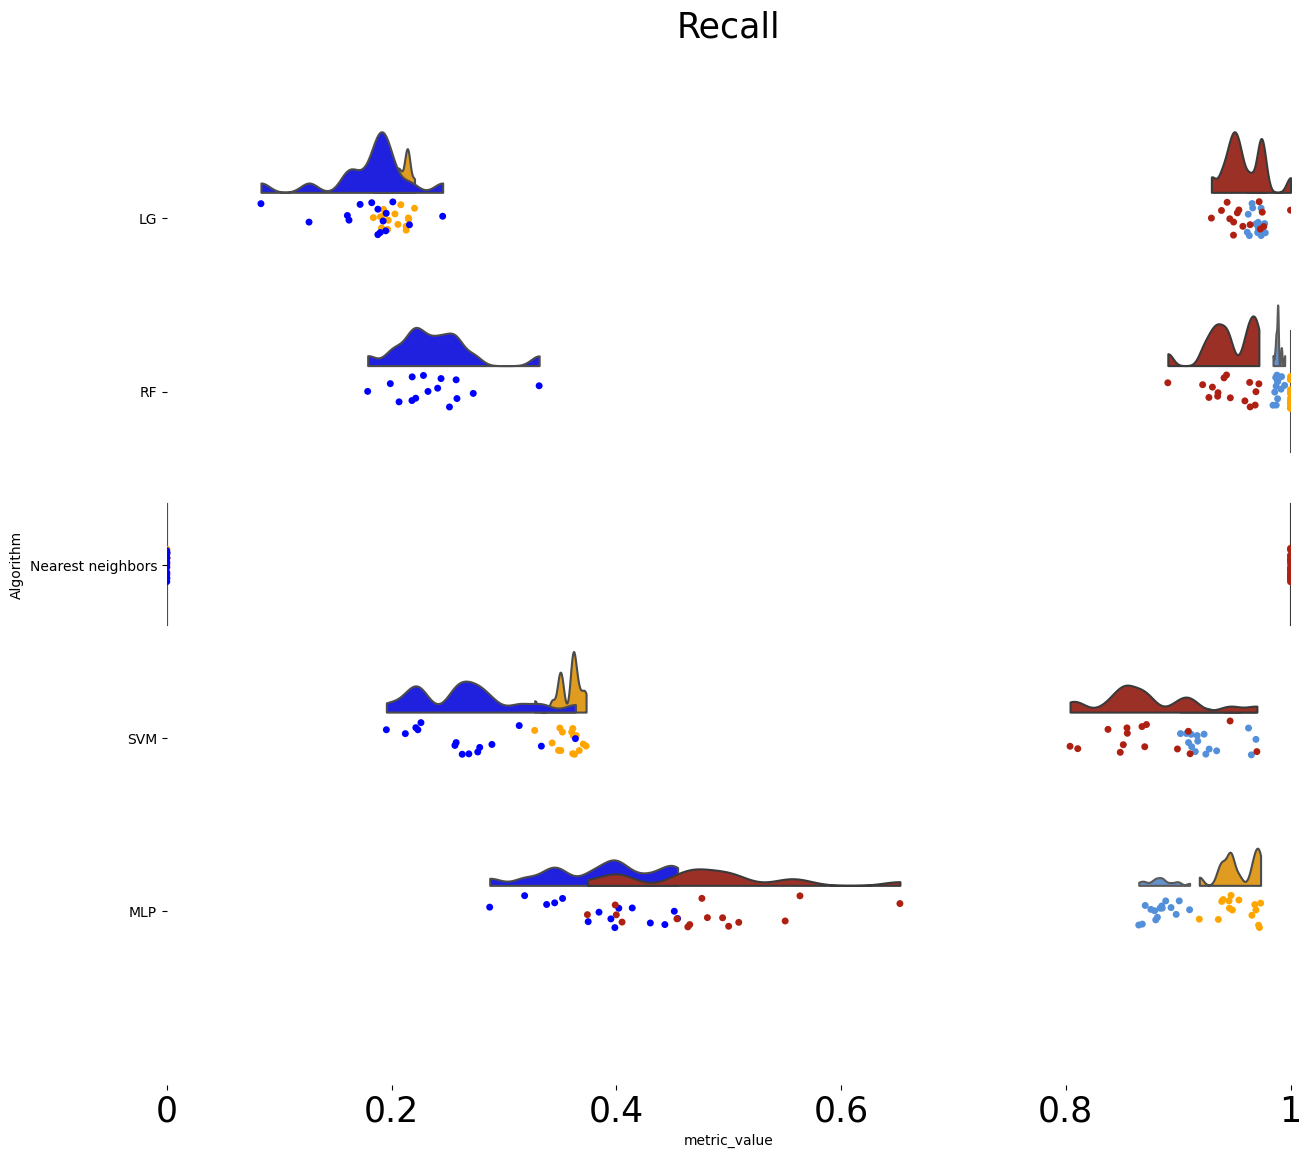

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

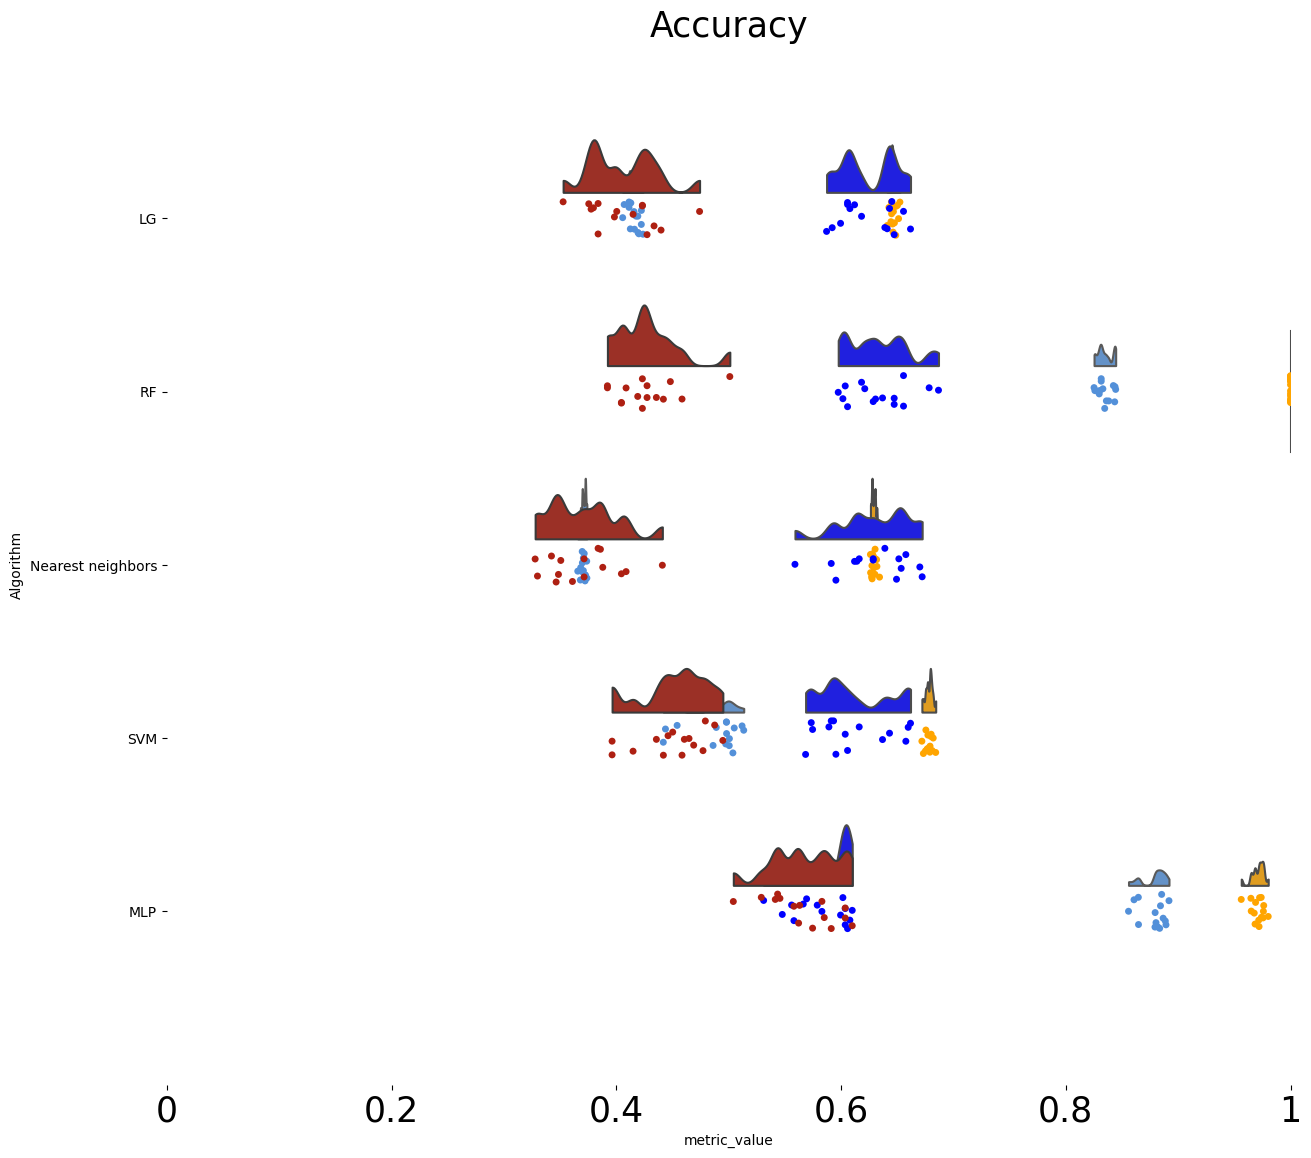

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

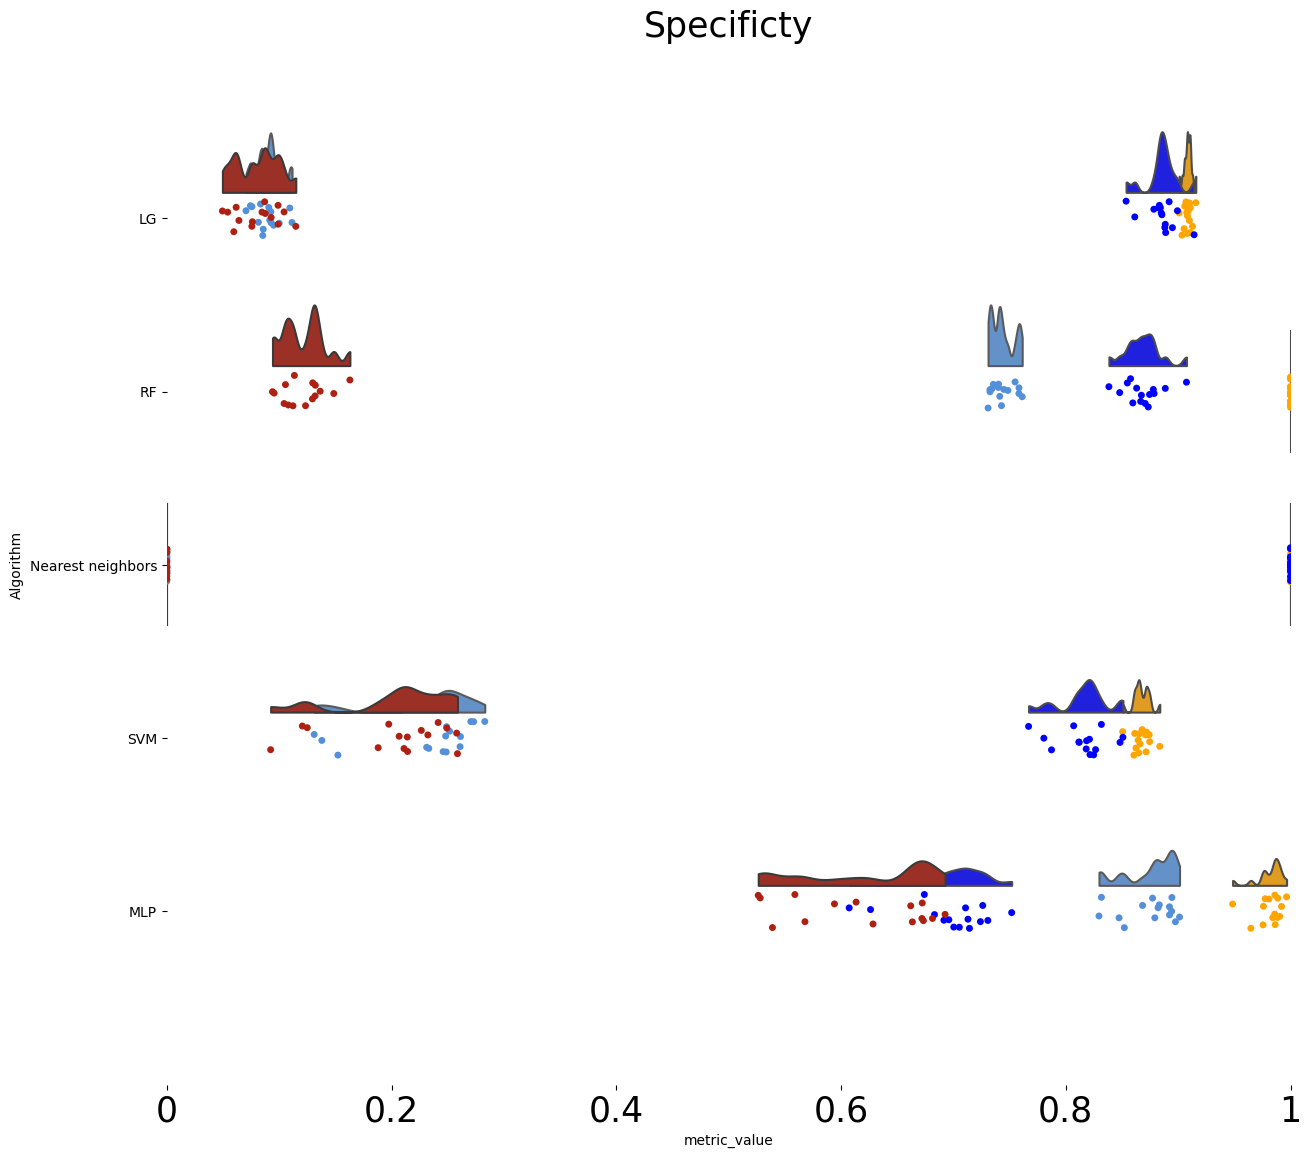

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

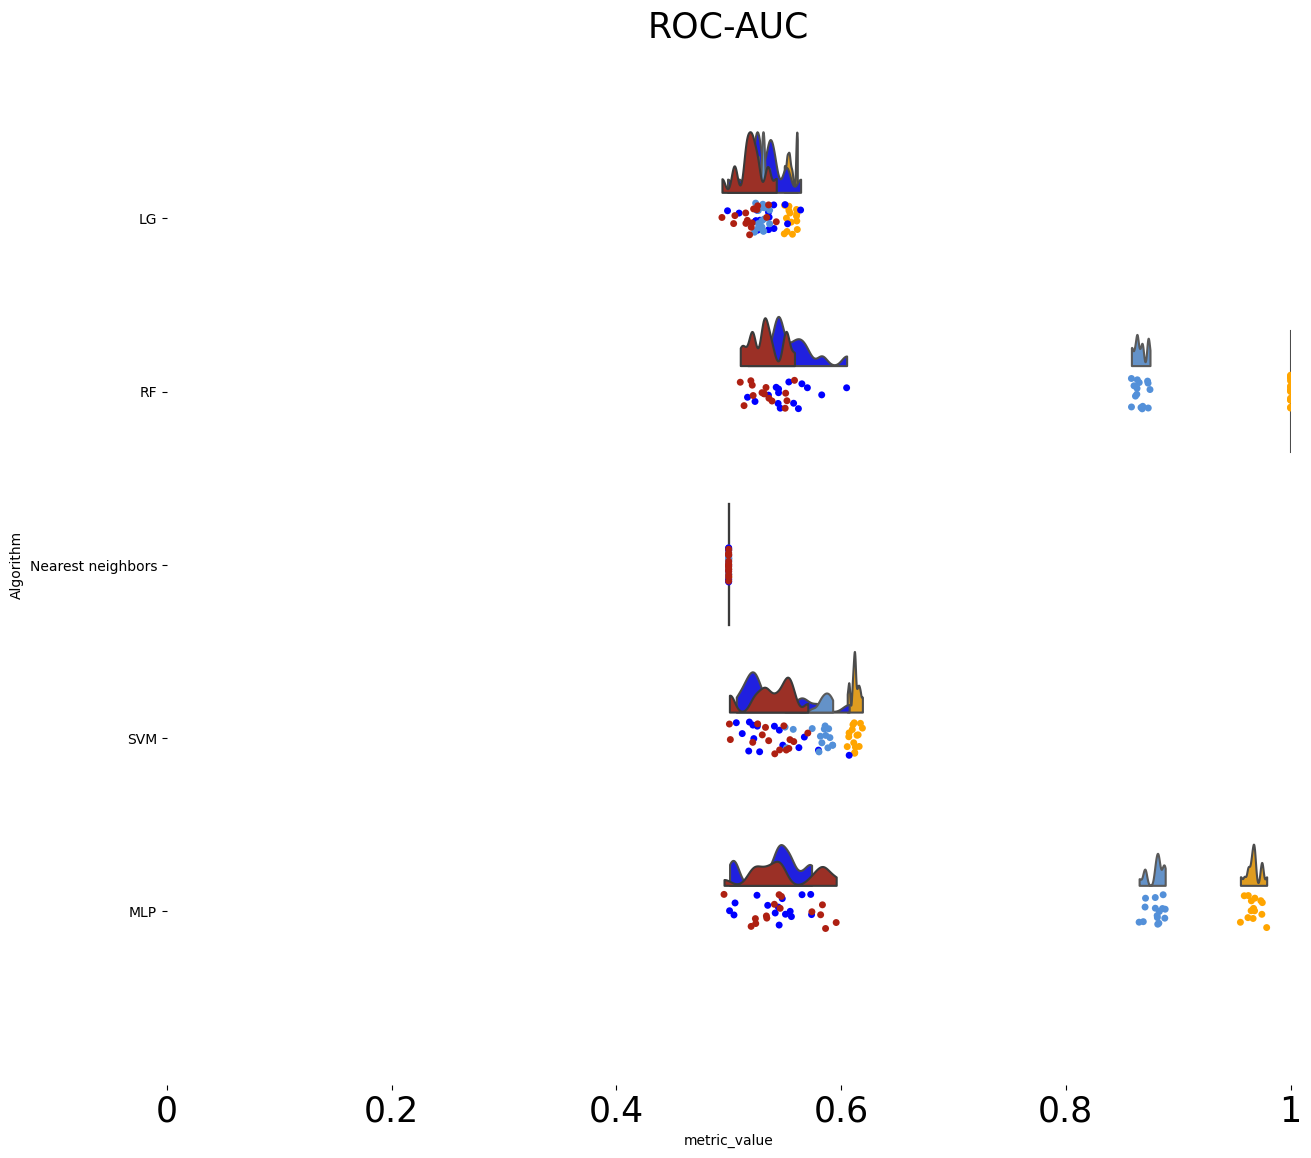

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

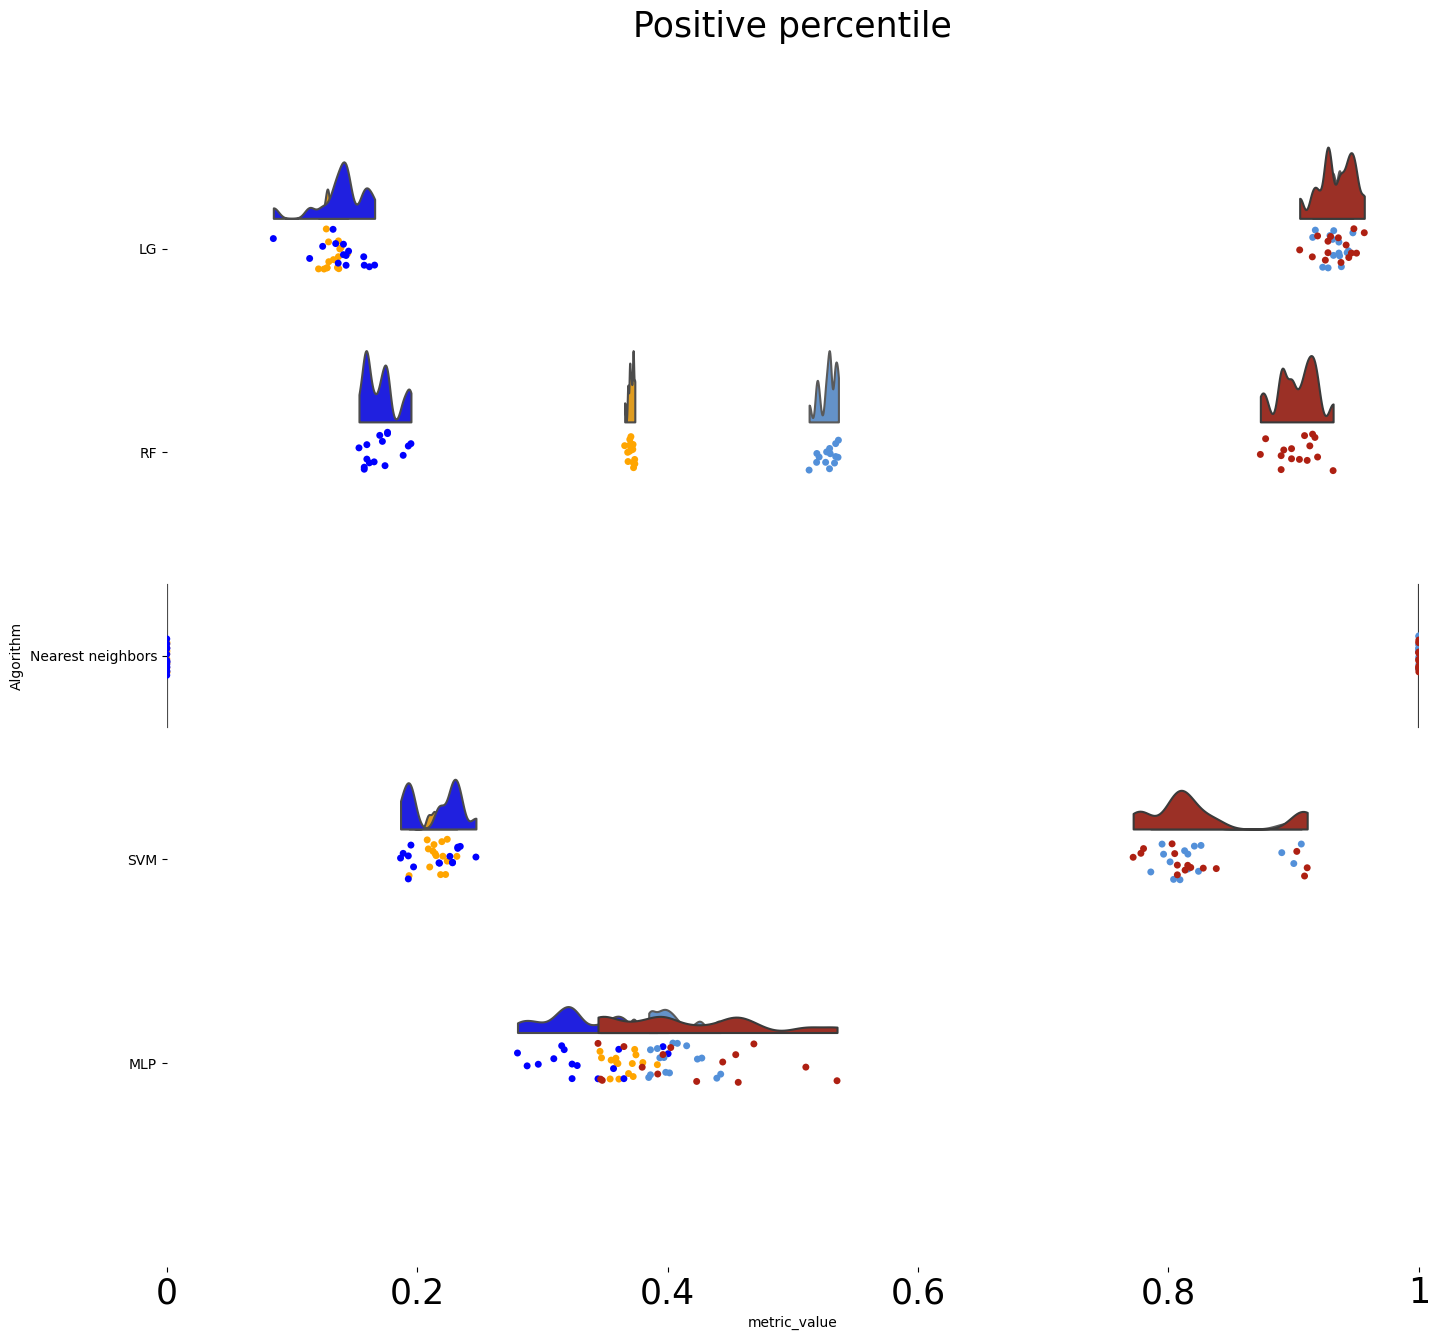

In [114]:
# algo_full_summary_dict # 'consensus_cv'
# fset_full_summary_dict
# pu_algo_full_summary_dict # 'consensus_cv'
# pu_fset_full_summary_dict

rain_drop_plotter = RainDropPlotter()
rain_drop_plotter.gen_plot_by_fset(fset_full_summary_dict, 4, pu_summary_dict=pu_fset_full_summary_dict)

# Radar plots

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` Axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding Axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

class RadarPlotter:
    def __init__(self, axs_names, line_colors=None, scale_colors=None):
        self.axs_names = axs_names # '#874CCC' '#C65BCF' 
        self.line_colors = line_colors if line_colors else ["#B5D5EE", '#56CFE1', '#5390D9', '#C65BCF', '#874CCC'] # ['#72EFDD', '#64DFDF', '#56CFE1', '#4EA8DE', '#5390D9']
        self.scale_colors = scale_colors if scale_colors else ['#E9D8A6', '#EE9B00', '#CA6702', '#BB3E03', '#AE2012']

    def init_axs(self, nrows=1, ncols=1): # 
        self.N = len(self.axs_names) 
        self.theta = radar_factory(self.N, frame='polygon')
        self.fig, self.axs = plt.subplots(figsize=(5*ncols, 24*nrows), nrows=nrows, ncols=ncols, #
                            subplot_kw=dict(projection='radar'))
        self.fig.subplots_adjust(wspace=0.5, hspace=0.25, top=0.85, bottom=0.05)

    def init_ax(self, ax, ax_title=None):
        ax.set_ylim([0,1])
        ax.set_rgrids([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        ax.set_rlabel_position(90)
        # ax.set_title(ax_title) 
        scale_positions = [0.2, 0.4, 0.6, 0.8, 1.0]
        for color, scale_point in zip(self.scale_colors, scale_positions):
            ax.plot(self.theta, [scale_point]*self.N, color=color, linewidth=2, alpha=0.4)

    def finish_design(self, ax):
        ax.set_varlabels([None]*4)
        for label in ax.get_yticklabels():
            label.set_visible(False)
        # ax.set_varlabels(self.axs_names)
        # ax.set_facecolor("lightpink")

    def gen_plot_by_eval_method(self, summary_dict, eval_method):
        estimator_names = ['LG', 'RF', 'SVM', 'Nearest neighbors', 'MLP']
        method_dict = summary_dict.get(eval_method)
        for estimator_name in estimator_names:
            if estimator_name in method_dict.keys():
                s_estimator_dict = method_dict.get(estimator_name)
                base_types = ['train_results', 'test_results']
                ordered_keys = base_types + [k for k in s_estimator_dict if k not in base_types]
                if 'full_results' in ordered_keys:
                    ordered_keys.remove('full_results')
                self.init_axs(ncols=len(ordered_keys))
                ordered_items = [(k, s_estimator_dict[k]) for k in ordered_keys]
                for ax, (metric_type, metric_dict) in zip(self.axs.flat, ordered_items):
                    self.init_ax(ax, metric_type)
                    for color, (fset_num, fset_dict) in zip(self.line_colors, metric_dict.items()):
                        mean_label_result = [np.mean(fset_dict.get(label)) for label in self.axs_names]
                        if fset_num<=3: # or fset_num==5: # fset_num<=3
                            ax.plot(self.theta, mean_label_result, color=color, linewidth=5, alpha=1-0.03*fset_num) # , alpha=1-0.07*plot_idx
                        # else:
                        #     ax.plot(self.theta, mean_label_result, color=color, linewidth=5, alpha=1-0.03*fset_num, linestyle='--')
                    self.finish_design(ax)

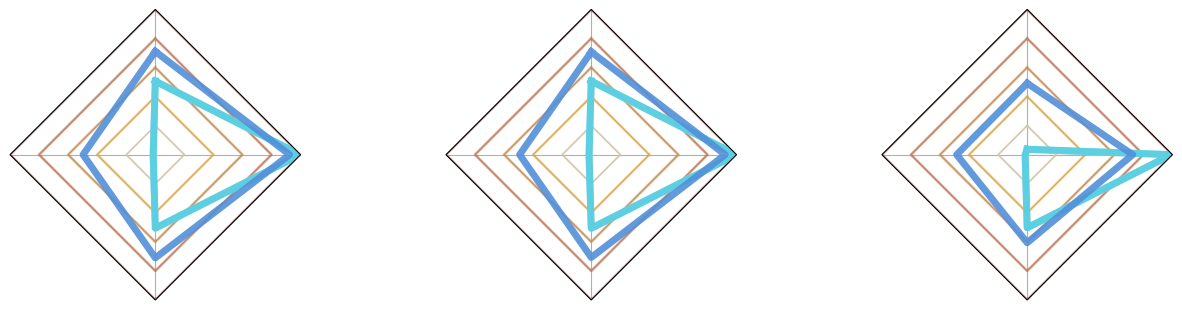

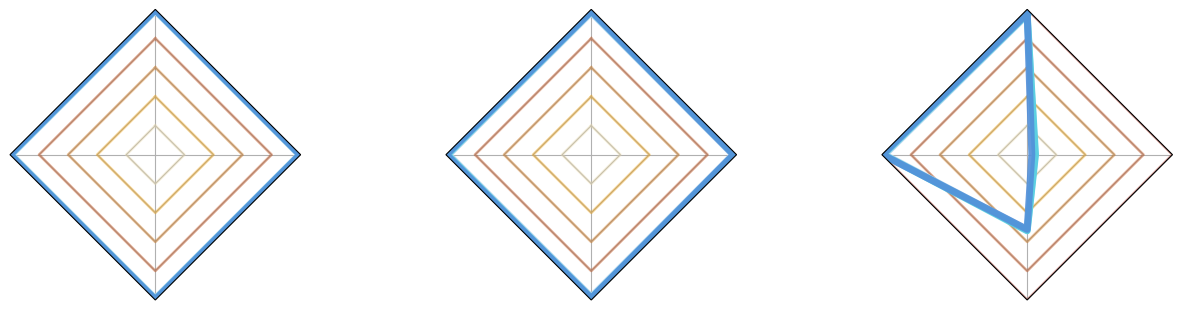

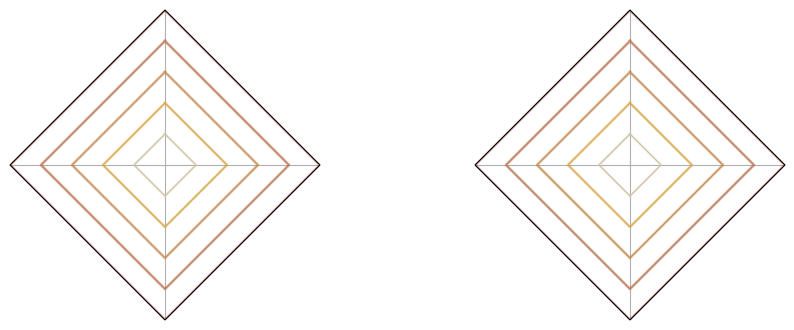

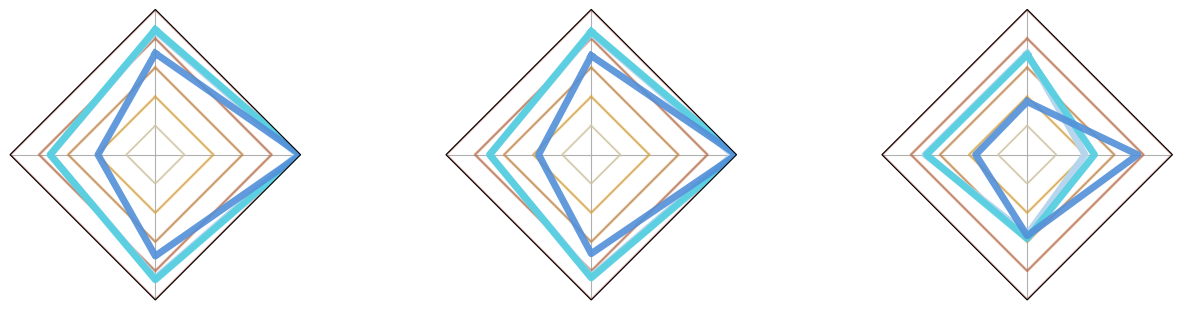

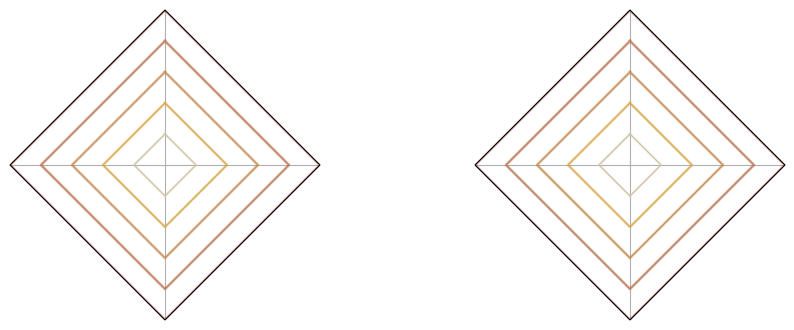

In [102]:
# algo_full_summary_dict # 'consensus_cv' # 'ensamble', 'os_SMOTE', 'combined'
# fset_full_summary_dict
# pu_algo_full_summary_dict # 'consensus_cv'
# pu_fset_full_summary_dict

# algo_ensamble_summary_dict
eval_method = 'combined' # 'combined'
metrics = ['Accuracy', 'Specificty','ROC-AUC', 'Recall']
radar_plotter = RadarPlotter(metrics)
radar_plotter.gen_plot_by_eval_method(pu_os_algo_full_summary_dict, eval_method) # pu_algo_ensamble_summary_dict
# ['LG', 'RF', 'SVM', 'Nearest neighbors', 'MLP']

# View CSD data and duplicate reduction process

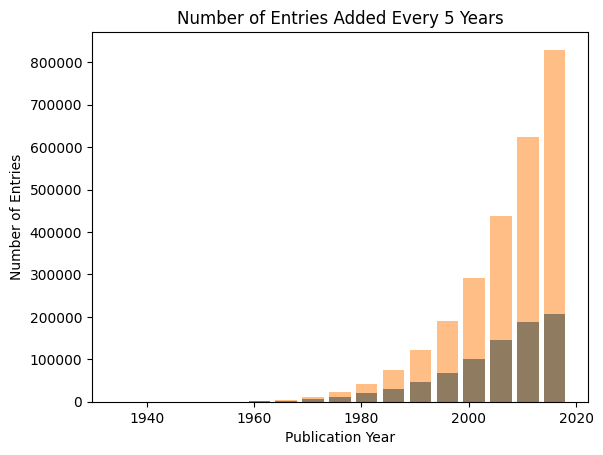

In [ ]:
csd_df = pd.read_feather(csd_feather_filename)

# Aggregate the data by bins of 5 years
bins = range(csd_df['Publication_year'].min(), csd_df['Publication_year'].max()+6, 5)
counts, _ = np.histogram(csd_df['Publication_year'], bins=bins)

# Create the bar chart
# plt.bar(bins[:-2], counts[:-1], width=4)
# plt.bar(bins[:-2], counts[:-1].sum(), width=4)
# plt.xlabel('Publication Year')
# plt.ylabel('Number of Entries')
# plt.title('Number of Entries Added Every 5 Years')
plt.bar(bins[:-2], counts[:-1], width=4)
plt.bar(bins[:-2], np.cumsum(counts[:-1]), width=4, alpha=0.5)
plt.xlabel('Publication Year')
plt.ylabel('Number of Entries')
plt.title('Number of Entries Added Every 5 Years')
plt.show()

## Duplicates reduction

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


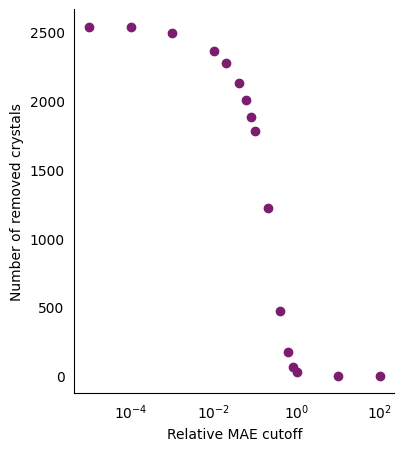

In [4]:
csd_df = pd.read_feather(csd_feather_filename)
dataset_editor=DatasetEditor(csd_df)
rmae_size_values=[]
# possible_cufoff_values = [10**(idx) for idx in range(-8, 6)]
possible_cufoff_values = [10**(-5), 10**(-4), 10**(-3), 10**(-2), 0.02, 0.04, 0.06, 0.08, 10**(-1), 0.2, 0.4, 0.6, 0.8, 10**(0), 10**(1), 10**(2)]
for relative_mae_cutoff in possible_cufoff_values:
    dataset_editor.reduce_relative_MAE_entries(relative_mae_cutoff=relative_mae_cutoff, verbose=False)
    original_dataset = dataset_editor.dataset
    dataset_editor.dataset = dataset_editor.kept_dataset
    dataset_editor.calculate_polymorph_properties(polymorph_method=POLYMORPH_METHOD)
    dataset_editor.dataset = original_dataset
    rmae_size_values.append((relative_mae_cutoff, dataset_editor.removed_size, dataset_editor.has_polymorph_percent))

rMAE_PLOT_SIZE = (6.4, 4.8)
rMAE_AX_POSITION = (0.1,0.1,0.5,0.8)

relative_mae_values, removed_size_values, polymorph_percent=zip(*rmae_size_values)
fig = plt.figure(figsize=rMAE_PLOT_SIZE)
ax = plt.axes(rMAE_AX_POSITION)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(relative_mae_values, removed_size_values, marker='o', c='#7C1D6F')
plt.tick_params(left = False, bottom = False) 
ax.set_xscale('log')
ax.set_xlabel('Relative MAE cutoff')
ax.set_ylabel('Number of removed crystals')
plt.show()